In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score

In [2]:
df = pd.read_csv("fleet_maintenance_data2.csv")
df

,Vehicle ID,Vehicle Type,Purchase Date,Mileage (km),Fuel Type,Last Maintenance Date,Maintenance Type,Maintenance Cost ($),Downtime (hours),Daily Usage Distance (km),Average Load (tons),Number of Trips Per Day,Route Type,Breakdown Date
0,9b56f11d-0fb6-42c4-a135-244500702bcc,Truck,2014-10-04,182767,Electric,2018-04-19,Battery Replacement,1462.84,11,395.83,27.34,9,Highway,2023-08-06
1,953fbd1a-c04a-4edb-bcce-a3f7b7ece418,Bus,2005-11-29,82888,Diesel,2018-01-19,Tire Replacement,1774.64,20,117.63,26.54,1,Mixed,2021-07-04
2,c4a5297d-e105-41da-b123-80a7b8295bf4,Truck,2008-07-05,202594,Petrol,2010-09-17,Battery Replacement,1308.74,44,443.49,11.89,3,Highway,NaN
3,5a1aab2e-1dc5-4a7b-9054-3ec8ebc89a32,Bus,2012-05-12,437756,Petrol,2017-08-16,Brake Replacement,535.46,26,272.22,12.39,2,Highway,2019-02-04
4,daee8656-1b03-4c42-b973-c4fc3ce2340d,Van,2015-08-16,75071,Petrol,2020-06-08,Tire Replacement,1817.93,48,82.10,11.41,9,Mixed,2021-12-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,fef58693-1b11-4d90-9375-76ef85c757b8,Truck,2014-12-02,189057,Electric,2020-06-27,Engine Repair,282.62,38,449.13,29.08,3,Highway,NaN
496,0153e601-88c0-4888-b24b-a0c5a419e6ae,Truck,2009-01-26,440576,Electric,2016-02-25,Engine Repair,1696.40,13,63.06,19.03,3,Mixed,NaN
497,606319b9-5b17-47df-bbb6-433fa86726d9,Van,2008-01-07,407348,Diesel,2016-09-18,Engine Repair,1259.40,9,351.46,15.93,8,Highway,2019-04-15
498,b588b782-c359-49a8-ba32-bc920c09e62d,Truck,2017-03-11,206609,Petrol,2023-08-13,Tire Replacement,1317.72,24,126.95,12.25,10,Highway,NaN


In [3]:
columns_to_drop = ['Vehicle ID', 'Purchase Date', 'Last Maintenance Date', 'Breakdown Date']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])


In [4]:
categorical_columns = ['Vehicle Type', 'Fuel Type', 'Maintenance Type', 'Route Type']
label_encoders = {}

In [5]:
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [6]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [7]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df['PCA1'] = df_pca[:, 0]
df['PCA2'] = df_pca[:, 1]


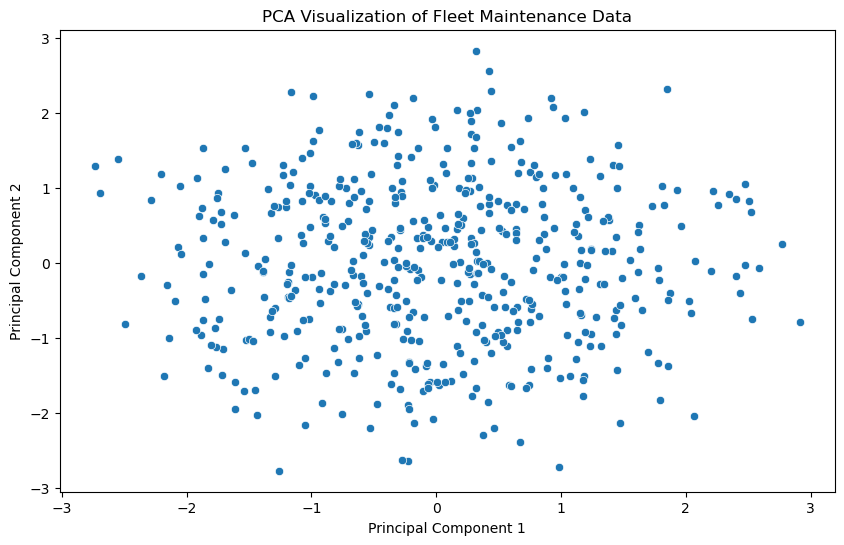

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Fleet Maintenance Data")
plt.show()

In [9]:
best_k = 2
best_score = -1
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    score = silhouette_score(df_scaled, labels)
    if score > best_score:
        best_k = k
        best_score = score


C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans 

In [10]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(df_scaled)

df['Cluster'] = labels

C:\Users\Lenovo\anaconda3\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [11]:
if 'Maintenance Type' in df.columns:
    accuracy = accuracy_score(df['Maintenance Type'], labels)
    print(f"Clustering Accuracy: {accuracy:.2f}")


Clustering Accuracy: 0.09


In [12]:
print(f"Optimal number of clusters: {best_k}")
print(f"Silhouette Score: {best_score:.2f}")
print("Cluster assignments:")
print(df[['Cluster']].value_counts())

Optimal number of clusters: 9
Silhouette Score: 0.09
Cluster assignments:
Cluster
4          74
1          68
7          59
8          56
2          52
0          51
3          51
5          48
6          41
dtype: int64
